# Abell 2255 Analysis

Abell 225 is a galaxy cluster located at approx. RA = 258.1292, DEC = 64.0925

We have already added all objects from the approximate location of Abell 2255 into data/sdss_data.csv

### Imports

In [202]:
import math
import pandas as pd
import matplotlib.pyplot as plt

### Data Handling

I removed all entries that do not have type=3. Type=3 is for galaxies and type=6 is stars.

In [203]:
color = pd.read_csv("../data/color_data.csv")
redshift = pd.read_csv("../data/redshift_data.csv")

data = pd.merge(color, redshift, left_on='objID', right_on='bestObjID', how='outer')
data = data[data.type == 3]
data['u_g'] = data['modelMag_u'] - data['modelMag_g']
data['g_r'] = data['modelMag_g'] - data['modelMag_r']

Some of this daya appears to be a bit scattered. I think some of these galaxies are in front/behind our targeted cluster. Maybe culling galaxies with very dissimilar redshifts will make the data better.

In [204]:
data = data[((data.z > .055) & (data.z < .095)) | (pd.isnull(data.z))]

I guess there is a lot of galaxies that do not have z values so much culling was not as useful as anticipated.

### Generate Graph

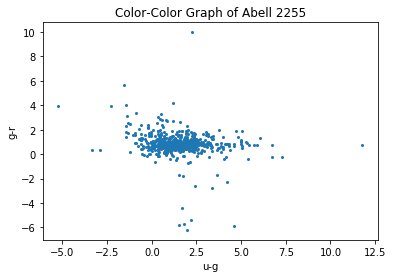

In [205]:
plt.scatter(x=data.u_g, y=data.g_r, s=4)
plt.xlabel("u-g")
plt.ylabel("g-r")
plt.title("Color-Color Graph of Abell 2255")
plt.show()